# Adult income dataset

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

Fields
The dataset contains 16 columns

Target filed: Income

-- The income is divide into two classes: <=50K and >50K

Number of attributes: 14

-- These are the demographics and other features to describe a person

https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

In [69]:
#Standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
#Download dataset and read from csv

df_inc = pd.read_csv("adult.csv")

df_inc.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [71]:
df_inc.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [72]:
df_inc.describe(include='all') # Doesnot make much sense most are categorical variables

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


#### Exploration of features

In [73]:
df_inc.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [74]:
df_inc.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [75]:
df_inc.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [76]:
df_inc['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

#### One Hot Encodding

Converts the values of all features into binary(0 or 1). Will be using pandas dummies instead of Scikit Learn

In [77]:
#To distinguish '?' in multiple features, adding prefix to all columns
df_inc=pd.concat([df_inc.drop('occupation',axis=1),pd.get_dummies(df_inc.occupation).add_prefix('occupation_')],axis=1)
df_inc=pd.concat([df_inc.drop('workclass',axis=1),pd.get_dummies(df_inc.workclass).add_prefix('workclass_')],axis=1)
df_inc=df_inc.drop('education',axis=1) #Already a col with education num exists
df_inc=pd.concat([df_inc.drop('marital-status',axis=1),pd.get_dummies(df_inc['marital-status']).add_prefix('marital-status_')],axis=1)
df_inc=pd.concat([df_inc.drop('relationship',axis=1),pd.get_dummies(df_inc.relationship).add_prefix('relationship_')],axis=1)
df_inc=pd.concat([df_inc.drop('race',axis=1),pd.get_dummies(df_inc.race).add_prefix('race_')],axis=1)
df_inc=pd.concat([df_inc.drop('native-country',axis=1),pd.get_dummies(df_inc['native-country']).add_prefix('native-country_')],axis=1)

In [78]:
df_inc.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0


Converting Gender and Income features into 0 and 1

In [79]:
df_inc['gender'] = df_inc['gender'].apply(lambda x:1 if x == 'Male' else 0)
df_inc['income'] = df_inc['income'].apply(lambda x:1 if x == '>50K' else 0)

In [80]:
df_inc

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [81]:
df_inc['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [82]:
#Display of column values
df_inc.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

#### Building of Correlation heatmap

In [83]:
df_inc.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


<AxesSubplot:>

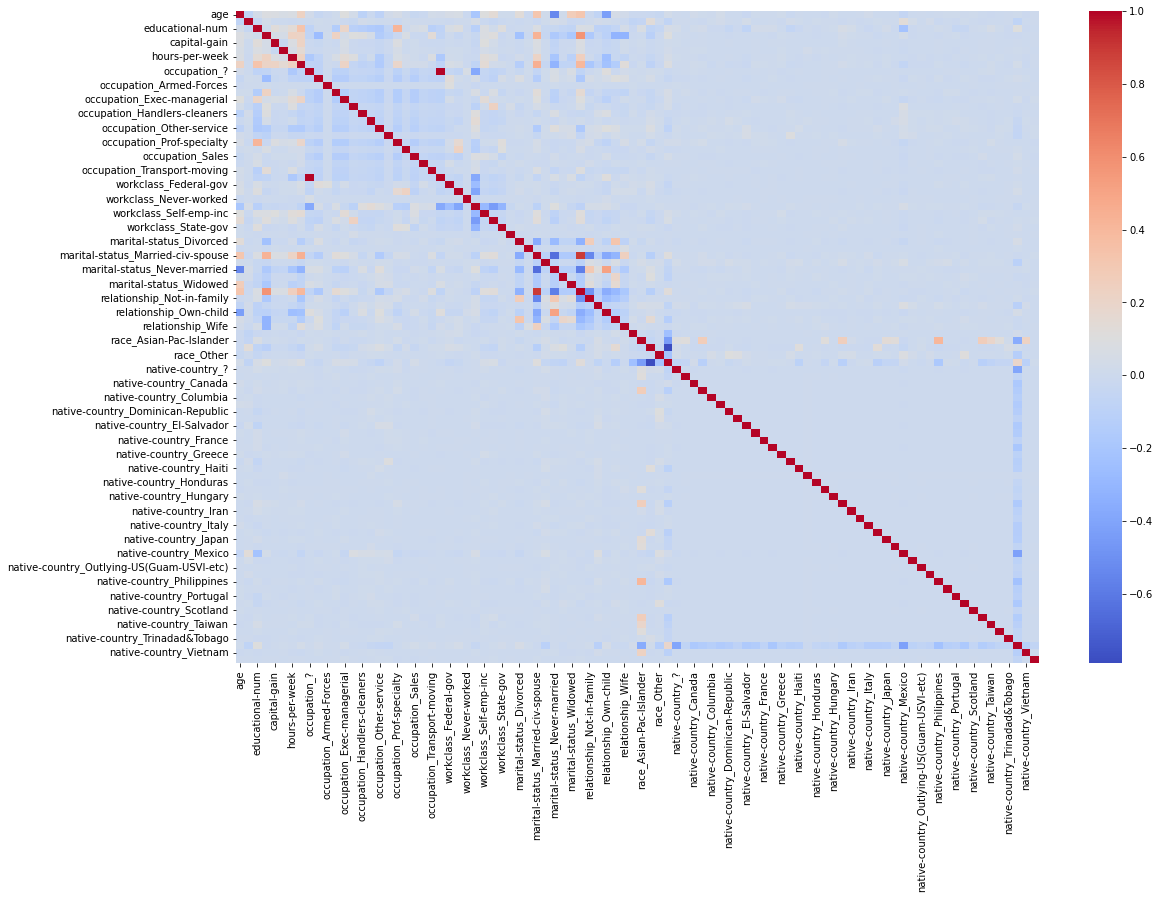

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df_inc.corr(),annot=False,cmap='coolwarm')

As there are lot of features, only select highly correlated features with income. Both +ve and -ve correlation close to 1 to be considered and near 0 to be discarded

In [85]:
correlations = df_inc.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df_inc.columns)) #To consider ony 80% of columns
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_inc_dropped = df_inc.drop(cols_to_drop,axis=1)

In [86]:
df_inc_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<AxesSubplot:>

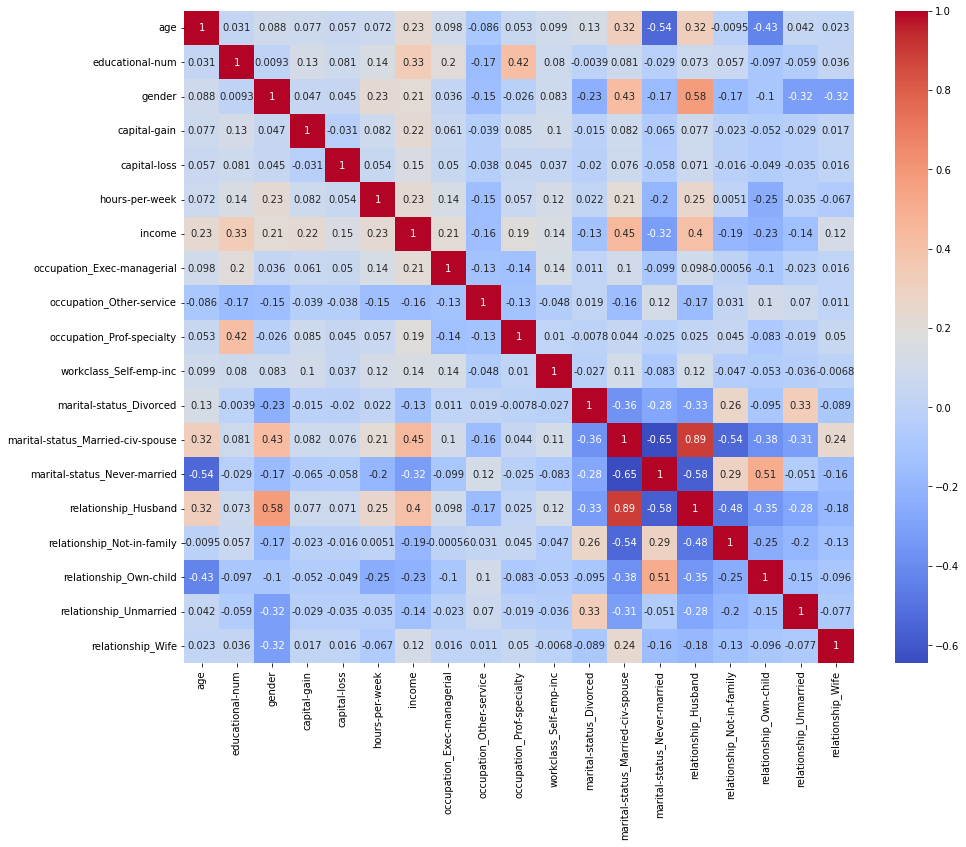

In [87]:
plt.figure(figsize=(15,12))
sns.heatmap(df_inc_dropped.corr(),annot=True,cmap='coolwarm')

### Random Forest Classifier

The reason to choose this algorithm is that the dataset has binary or 0,1 kind of values which is mainly saying Yes or No. There are not many numerical features to use a different algo. Also RFC is selected because this is an ensemble of Decision Tress ie has multiple DT which will help in deciding Income group.

Here all features will be used with 92 columns to split data into train and test

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df_inc=df_inc.drop('fnlwgt',axis=1)  # dropping this column as not much significant

train_df,test_df = train_test_split(df_inc,test_size=0.2)

In [89]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
13899,45,11,0,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31611,57,10,1,0,1672,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34532,61,14,1,7298,0,60,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6251,23,13,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10326,61,9,0,0,0,36,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46897,45,10,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15510,41,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37790,37,2,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9345,28,14,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [90]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
32116,29,9,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
23306,21,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37889,29,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43062,42,9,0,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38419,23,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34327,31,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44328,38,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15061,52,9,1,7298,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38738,21,10,0,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
train_X = train_df.drop('income',axis=1)
train_y = train_df['income']

test_X = test_df.drop('income',axis=1)
test_y = test_df['income']

In [92]:
train_X

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
13899,45,11,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31611,57,10,1,0,1672,45,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
34532,61,14,1,7298,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6251,23,13,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10326,61,9,0,0,0,36,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46897,45,10,1,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15510,41,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37790,37,2,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9345,28,14,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [93]:
train_y

13899    1
31611    0
34532    1
6251     0
10326    0
        ..
46897    0
15510    0
37790    0
9345     0
10041    0
Name: income, Length: 39073, dtype: int64

In [94]:
test_X

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
32116,29,9,0,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
23306,21,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37889,29,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43062,42,9,0,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38419,23,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34327,31,9,1,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
44328,38,9,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15061,52,9,1,7298,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
38738,21,10,0,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
test_y

32116    0
23306    0
37889    0
43062    0
38419    0
        ..
34327    0
44328    0
15061    1
38738    0
45326    0
Name: income, Length: 9769, dtype: int64

<b>Fitting training data in RFC</b>

In [96]:
forest = RandomForestClassifier()

forest.fit(train_X,train_y)

RandomForestClassifier()

<b>Checking score of test data on RFC model</b>

In [97]:
forest.score(test_X,test_y)

0.8490121813901116

<b>To check the feature importances</b>

In [98]:
forest.feature_importances_

array([2.27211963e-01, 1.31997740e-01, 1.45680425e-02, 1.12831844e-01,
       3.69577089e-02, 1.12438043e-01, 1.68797200e-03, 5.03133361e-03,
       8.43101197e-05, 6.28430098e-03, 2.01665220e-02, 4.68465605e-03,
       3.61423926e-03, 4.42220184e-03, 7.81127119e-03, 2.24086397e-04,
       1.61311418e-02, 2.86156956e-03, 6.00318001e-03, 3.99769947e-03,
       4.46336738e-03, 1.67166239e-03, 4.77212583e-03, 5.54676842e-03,
       1.40497689e-06, 9.26817741e-03, 6.12071241e-03, 7.83750566e-03,
       4.16861249e-03, 1.09885244e-04, 5.53819956e-03, 4.51105593e-04,
       7.13350341e-02, 9.28544640e-04, 2.36569055e-02, 1.66753716e-03,
       1.74927625e-03, 4.74239703e-02, 1.14886293e-02, 2.06807810e-03,
       1.11818407e-02, 5.22192301e-03, 1.09339573e-02, 1.32122472e-03,
       2.74425501e-03, 4.58186443e-03, 9.26721442e-04, 6.12847037e-03,
       3.00357929e-03, 1.68629606e-04, 1.31258375e-03, 5.80407543e-04,
       3.17041113e-04, 8.19700882e-04, 2.24693591e-04, 1.51229605e-04,
      

In [99]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [100]:
#Zipping both feature names and importance in a dictionary
importances = dict(zip(forest.feature_names_in_,forest.feature_importances_))

#Sorting the features based on importances
importances = {k: v for k,v in sorted(importances.items(),key=lambda x:x[1],reverse=True)}

In [101]:
importances

{'age': 0.22721196300102023,
 'educational-num': 0.13199774004680914,
 'capital-gain': 0.11283184411894569,
 'hours-per-week': 0.11243804311087893,
 'marital-status_Married-civ-spouse': 0.07133503410335555,
 'relationship_Husband': 0.04742397034590988,
 'capital-loss': 0.036957708857141926,
 'marital-status_Never-married': 0.023656905502388068,
 'occupation_Exec-managerial': 0.020166522012272318,
 'occupation_Prof-specialty': 0.016131141772309645,
 'gender': 0.014568042450977578,
 'relationship_Not-in-family': 0.01148862930751598,
 'relationship_Own-child': 0.011181840707903196,
 'relationship_Wife': 0.010933957279987971,
 'workclass_Private': 0.009268177406206897,
 'workclass_Self-emp-not-inc': 0.00783750566383514,
 'occupation_Other-service': 0.007811271188946853,
 'occupation_Craft-repair': 0.006284300978527214,
 'race_White': 0.006128470367681249,
 'workclass_Self-emp-inc': 0.006120712414125485,
 'occupation_Sales': 0.0060031800124988955,
 'native-country_United-States': 0.00596530

### Tuning RFC with hyperparameter using GridSearch

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[50,100,250],
    'max_depth':[5,10,30,None],
    'min_samples_split':[2,4],
    'max_features':['sqrt','log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=param_grid,verbose=10)

In [103]:
grid_search.fit(train_X,train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.6s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   0.6s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.5s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.5s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

[CV 4/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.816 total time=   1.0s
[CV 5/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.816 total time=   1.0s
[CV 1/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 1/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.815 total time=   2.5s
[CV 2/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 2/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.812 total time=   2.8s
[CV 3/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 3/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.808 total time=   2.8s
[CV 4/5; 9/48] START max_d

[CV 3/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.863 total time=   1.1s
[CV 4/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 4/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.861 total time=   1.1s
[CV 5/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 5/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.852 total time=   1.1s
[CV 1/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 1/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.862 total time=   2.5s
[CV 2/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 2/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.862 total time=   2.3s
[CV 3/5; 17/4

[CV 1/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.857 total time=   3.9s
[CV 2/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 2/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.853 total time=   3.9s
[CV 3/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 3/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.858 total time=   3.9s
[CV 4/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 4/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.857 total time=   4.3s
[CV 5/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 5/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.848 total time=   4.3s
[CV 1/5;

[CV 4/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.863 total time=   1.8s
[CV 5/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.852 total time=   1.8s
[CV 1/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 1/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.863 total time=   3.7s
[CV 2/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 2/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.856 total time=   3.8s
[CV 3/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 3/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.863 total time=   3.7s
[CV 4/5; 32

[CV 2/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.850 total time=  11.7s
[CV 3/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.854 total time=  11.8s
[CV 4/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 4/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.852 total time=  11.8s
[CV 5/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 5/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.845 total time=  11.6s
[CV 1/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 1/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.857 total time=

[CV 5/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.849 total time=   1.9s
[CV 1/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 1/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.856 total time=   3.9s
[CV 2/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 2/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.853 total time=   3.9s
[CV 3/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 3/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.855 total time=   3.9s
[CV 4/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 4/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.856 total time

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [104]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=4,
                       n_estimators=250)

In [105]:
forest = grid_search.best_estimator_

In [106]:
forest.score(test_X,test_y)

0.8620124884839799

In [107]:
importances = dict(zip(forest.feature_names_in_,forest.feature_importances_))
importances = {k: v for k,v in sorted(importances.items(),key=lambda x:x[1],reverse=True)}

In [108]:
importances

{'age': 0.14403688623332295,
 'educational-num': 0.13214137368377982,
 'capital-gain': 0.13089056780723557,
 'hours-per-week': 0.08815645834736184,
 'marital-status_Married-civ-spouse': 0.08192977420370078,
 'relationship_Husband': 0.05956557351807629,
 'capital-loss': 0.04400134247943355,
 'marital-status_Never-married': 0.0405207406540172,
 'occupation_Exec-managerial': 0.027650868779956626,
 'occupation_Prof-specialty': 0.02301133040564898,
 'gender': 0.017670631904912863,
 'relationship_Not-in-family': 0.01735949695282053,
 'relationship_Wife': 0.013365700625808982,
 'relationship_Own-child': 0.012979250879495498,
 'occupation_Other-service': 0.010957111853310397,
 'marital-status_Divorced': 0.010948081522294996,
 'workclass_Self-emp-not-inc': 0.00847906428393837,
 'relationship_Unmarried': 0.008241636201450875,
 'workclass_Private': 0.007920425274872871,
 'workclass_Self-emp-inc': 0.007072950896641351,
 'occupation_Craft-repair': 0.006137792345527555,
 'native-country_United-State